In [2]:
# %%writefile 'imports.py'

import os

import pandas as pd


Writing imports.py


In [6]:
# %load 'imports.py'

import os

import pandas as pd


In [7]:
exam_data = pd.read_csv('http://roycekimmons.com/system/generate_data.php?dataset=exams&n=100')

In [8]:
exam_data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,standard,none,61,64,67
1,female,group B,bachelor's degree,standard,completed,85,100,100
2,male,group E,some high school,standard,none,90,83,77
3,male,group E,high school,standard,completed,88,79,76
4,female,group B,high school,standard,completed,68,83,84


In [9]:
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       100 non-null    object
 1   race/ethnicity               100 non-null    object
 2   parental level of education  100 non-null    object
 3   lunch                        100 non-null    object
 4   test preparation course      100 non-null    object
 5   math score                   100 non-null    int64 
 6   reading score                100 non-null    int64 
 7   writing score                100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [10]:
exam_data.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.630000,70.850000,70.030000
std,14.305932,14.251263,14.837473
min,24.000000,32.000000,30.000000
25%,58.000000,63.000000,61.000000
50%,67.500000,71.500000,71.000000
75%,77.250000,79.250000,79.250000
max,96.000000,100.000000,100.000000


In [12]:
exam_data.shape

(100, 8)

In [13]:
math_average = exam_data['math score'].mean()
reading_average = exam_data['reading score'].mean()
writing_average = exam_data['writing score'].mean()

f'M avg = {math_average}, R avg = {reading_average}, W avg = {writing_average}'

In [14]:
f'M avg = {math_average}, R avg = {reading_average}, W avg = {writing_average}'

'M avg = 66.63, R avg = 70.85, W avg = 70.03'

In [15]:
from sklearn import preprocessing

In [17]:
exam_data['math score'] = preprocessing.scale(exam_data['math score'])
exam_data['reading score'] = preprocessing.scale(exam_data['reading score'])
exam_data['writing score'] = preprocessing.scale(exam_data['writing score'])

In [18]:
exam_data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
24,female,group E,some college,standard,completed,1.290552,1.914692,1.759116
19,female,group C,high school,free/reduced,none,-0.044260,1.068419,0.607596
27,female,group B,some college,standard,completed,0.447513,1.421033,1.420433
65,female,group A,bachelor's degree,standard,none,-0.395526,0.363192,-0.002032
79,female,group E,bachelor's degree,free/reduced,none,0.166500,0.222147,0.675332


In [19]:
math_average = exam_data['math score'].mean()
reading_average = exam_data['reading score'].mean()
writing_average = exam_data['writing score'].mean()

f'M avg = {math_average}, R avg = {reading_average}, W avg = {writing_average}'

'M avg = 3.397282455352979e-16, R avg = 4.285460875053104e-16, W avg = -5.995204332975846e-17'

In [23]:
f'{3.397282455352979e-16:.20f}'

'0.00000000000000033973'

## Label encoding

In [24]:
le = preprocessing.LabelEncoder()
exam_data['gender'] = le.fit_transform(exam_data['gender'].astype(str))

In [25]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group C,some high school,standard,none,-0.395526,-0.483081,-0.205241
1,0,group B,bachelor's degree,standard,completed,1.290552,2.055737,2.030062
2,1,group E,some high school,standard,none,1.641818,0.856851,0.472123
3,1,group E,high school,standard,completed,1.501311,0.574760,0.404387
4,0,group B,high school,standard,completed,0.096247,0.856851,0.946278


In [26]:
le.classes_

array(['female', 'male'], dtype=object)

In [28]:
le.classes_

array(['female', 'male'], dtype=object)

## One-hot encoding

In [29]:
pd.get_dummies(exam_data['race/ethnicity'])


,group A,group B,group C,group D,group E
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
95,0,0,1,0,0
96,0,1,0,0,0
97,0,1,0,0,0
98,0,1,0,0,0


In [30]:
exam_data = pd.get_dummies(exam_data, columns=['race/ethnicity'])
exam_data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,some high school,standard,none,-0.395526,-0.483081,-0.205241,0,0,1,0,0
1,0,bachelor's degree,standard,completed,1.290552,2.055737,2.030062,0,1,0,0,0
2,1,some high school,standard,none,1.641818,0.856851,0.472123,0,0,0,0,1
3,1,high school,standard,completed,1.501311,0.574760,0.404387,0,0,0,0,1
4,0,high school,standard,completed,0.096247,0.856851,0.946278,0,1,0,0,0


In [31]:
exam_data = pd.get_dummies(exam_data, columns=['parental level of education', 'lunch', 'test preparation course'])
exam_data.head()

,gender,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,-0.395526,-0.483081,-0.205241,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
1,0,1.290552,2.055737,2.030062,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
2,1,1.641818,0.856851,0.472123,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
3,1,1.501311,0.574760,0.404387,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
4,0,0.096247,0.856851,0.946278,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0


In [32]:
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   gender                                          100 non-null    int64  
 1   math score                                      100 non-null    float64
 2   reading score                                   100 non-null    float64
 3   writing score                                   100 non-null    float64
 4   race/ethnicity_group A                          100 non-null    uint8  
 5   race/ethnicity_group B                          100 non-null    uint8  
 6   race/ethnicity_group C                          100 non-null    uint8  
 7   race/ethnicity_group D                          100 non-null    uint8  
 8   race/ethnicity_group E                          100 non-null    uint8  
 9   parental level of education_associate's degr

---

In [33]:
from sklearn.feature_extraction.text import CountVectorizer 

In [34]:
corpus = ['This is the first document.',
          'This is the second document.', 
          'Third document. Document number three', 
          'Number four. To repeat, number four']

## Bag of words

In [35]:
vectorize = CountVectorizer()
bag_of_words = vectorize.fit_transform(corpus)
bag_of_words

<4x12 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [36]:
print(bag_of_words)

  (0, 9)	1
  (0, 3)	1
  (0, 7)	1
  (0, 1)	1
  (0, 0)	1
  (1, 9)	1
  (1, 3)	1
  (1, 7)	1
  (1, 0)	1
  (1, 6)	1
  (2, 0)	2
  (2, 8)	1
  (2, 4)	1
  (2, 10)	1
  (3, 4)	2
  (3, 2)	2
  (3, 11)	1
  (3, 5)	1


In [38]:
vectorize.vocabulary_.get('document')

0

In [39]:
vectorize.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 1,
 'document': 0,
 'second': 6,
 'third': 8,
 'number': 4,
 'three': 10,
 'four': 2,
 'to': 11,
 'repeat': 5}

In [40]:
pd.DataFrame(bag_of_words.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,0,1,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,1,1,0,1,0,0
2,2,0,0,0,1,0,0,0,1,0,1,0
3,0,0,2,0,2,1,0,0,0,0,0,1


In [41]:
pd.DataFrame(bag_of_words.toarray(), columns=vectorize.get_feature_names_out())

,document,first,four,is,number,repeat,second,the,third,this,three,to
0,1,1,0,1,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,1,1,0,1,0,0
2,2,0,0,0,1,0,0,0,1,0,1,0
3,0,0,2,0,2,1,0,0,0,0,0,1


## TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
bag_of_words = vectorizer.fit_transform(corpus)
print(bag_of_words)

  (0, 0)	0.3528554929793508
  (0, 1)	0.5528163151092931
  (0, 7)	0.43584673254990375
  (0, 3)	0.43584673254990375
  (0, 9)	0.43584673254990375
  (1, 6)	0.5528163151092931
  (1, 0)	0.3528554929793508
  (1, 7)	0.43584673254990375
  (1, 3)	0.43584673254990375
  (1, 9)	0.43584673254990375
  (2, 10)	0.4850008395708102
  (2, 4)	0.3823802326982809
  (2, 8)	0.4850008395708102
  (2, 0)	0.6191395067937654
  (3, 5)	0.3432724906138499
  (3, 11)	0.3432724906138499
  (3, 2)	0.6865449812276998
  (3, 4)	0.5412799489419371


In [44]:
vectorizer.vocabulary_

{'this': 9,
 'is': 3,
 'the': 7,
 'first': 1,
 'document': 0,
 'second': 6,
 'third': 8,
 'number': 4,
 'three': 10,
 'four': 2,
 'to': 11,
 'repeat': 5}

In [45]:
pd.DataFrame(bag_of_words.toarray(), columns=vectorize.get_feature_names_out())

,document,first,four,is,number,repeat,second,the,third,this,three,to
0,0.352855,0.552816,0.000000,0.435847,0.00000,0.000000,0.000000,0.435847,0.000000,0.435847,0.000000,0.000000
1,0.352855,0.000000,0.000000,0.435847,0.00000,0.000000,0.552816,0.435847,0.000000,0.435847,0.000000,0.000000
2,0.619140,0.000000,0.000000,0.000000,0.38238,0.000000,0.000000,0.000000,0.485001,0.000000,0.485001,0.000000
3,0.000000,0.000000,0.686545,0.000000,0.54128,0.343272,0.000000,0.000000,0.000000,0.000000,0.000000,0.343272


In [46]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=8)
feature_vector = vectorizer.fit_transform(corpus)
print(feature_vector)

  (0, 0)	-0.8944271909999159
  (0, 5)	0.4472135954999579
  (0, 6)	0.0
  (1, 0)	-0.5773502691896258
  (1, 3)	0.5773502691896258
  (1, 5)	0.5773502691896258
  (1, 6)	0.0
  (2, 0)	-0.7559289460184544
  (2, 3)	0.3779644730092272
  (2, 5)	0.3779644730092272
  (2, 7)	0.3779644730092272
  (3, 0)	0.31622776601683794
  (3, 3)	0.31622776601683794
  (3, 5)	0.6324555320336759
  (3, 7)	0.6324555320336759


---

In [47]:
import cv2

In [50]:
image = cv2.imread(os.path.join('dataset01', 'dog.jpg'))

In [51]:
import matplotlib
import matplotlib.pyplot as plt

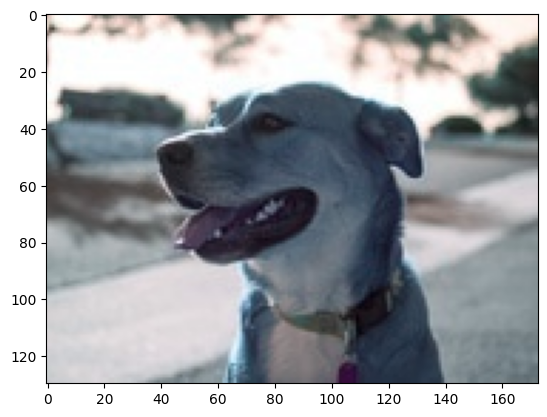

In [52]:
plt.imshow(image)

In [53]:
image.shape

(130, 173, 3)

In [54]:
image

array([[[199, 171, 164],
        [229, 206, 198],
        [251, 237, 231],
        ...,
        [253, 242, 234],
        [254, 243, 235],
        [254, 243, 235]],

       [[219, 196, 188],
        [228, 209, 201],
        [247, 236, 228],
        ...,
        [254, 243, 235],
        [254, 242, 236],
        [255, 243, 237]],

       [[226, 210, 198],
        [223, 211, 201],
        [236, 231, 222],
        ...,
        [255, 242, 236],
        [255, 241, 238],
        [255, 240, 237]],

       ...,

       [[203, 207, 208],
        [199, 203, 204],
        [200, 202, 203],
        ...,
        [ 98, 112, 118],
        [ 99, 113, 119],
        [ 99, 113, 119]],

       [[201, 202, 206],
        [203, 204, 208],
        [204, 205, 209],
        ...,
        [103, 115, 119],
        [107, 119, 123],
        [104, 116, 120]],

       [[200, 201, 205],
        [201, 202, 206],
        [203, 204, 208],
        ...,
        [106, 118, 122],
        [111, 123, 127],
        [108, 120, 124]]

In [55]:
image[0][0]

array([199, 171, 164], dtype=uint8)

In [56]:
size=(32,32)
resized_image_feature_vector = cv2.resize(image, size)

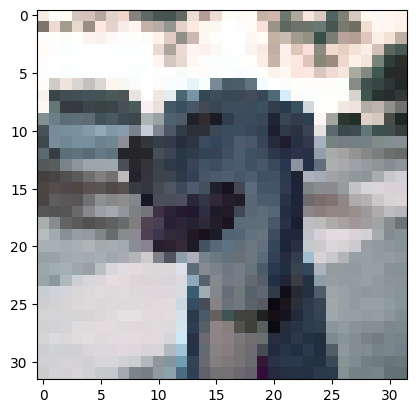

In [57]:
plt.imshow(resized_image_feature_vector)

In [58]:
resized_flattened_image_feature_vector = resized_image_feature_vector.flatten()

In [59]:
len(resized_flattened_image_feature_vector)

3072

In [61]:
image_g = cv2.imread(os.path.join('dataset01', 'dog.jpg'), cv2.IMREAD_GRAYSCALE)

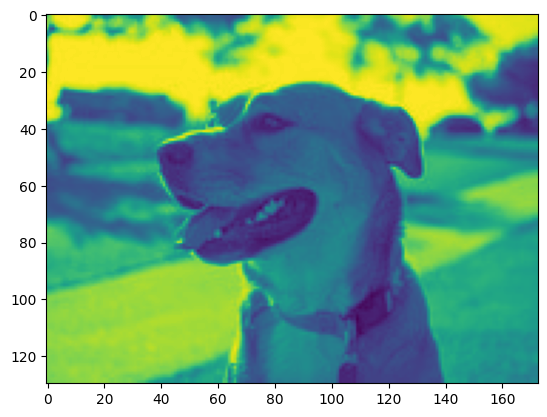

In [62]:
plt.imshow(image_g)

In [63]:
image_g.shape

(130, 173)

In [64]:
import numpy as np

In [65]:
image_g_e = np.expand_dims(image_g, axis=2)
image_g_e.shape

(130, 173, 1)

In [66]:
image_g_e

array([[[172],
        [206],
        [237],
        ...,
        [241],
        [242],
        [242]],

       [[196],
        [209],
        [235],
        ...,
        [242],
        [242],
        [243]],

       [[208],
        [209],
        [229],
        ...,
        [242],
        [242],
        [241]],

       ...,

       [[207],
        [203],
        [202],
        ...,
        [112],
        [113],
        [113]],

       [[203],
        [205],
        [206],
        ...,
        [115],
        [119],
        [116]],

       [[202],
        [203],
        [205],
        ...,
        [118],
        [123],
        [120]]], dtype=uint8)

In [67]:
from sklearn import datasets

In [68]:
datasets

<module 'sklearn.datasets' from '/home/saek/projects/python_kings/data_science/lib/python3.10/site-packages/sklearn/datasets/__init__.py'>

In [69]:
mnist_data = pd.read_csv(os.path.join('dataset01', 'train.csv'))

In [70]:
mnist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [71]:
mnist_data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split

features = mnist_data.columns[1:]
X = mnist_data[features]
y = mnist_data['label']

X_train, X_test, y_train, y_test = train_test_split(X/255., y, test_size=0.1, random_state=42)

In [78]:
from sklearn.svm import LinearSVC

lsc_sum = LinearSVC(dual=False)
lsc_sum.fit(X_train, y_train)

LinearSVC(dual=False)

In [79]:
y_pred_sum = lsc_sum.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
acc_sum = accuracy_score(y_test, y_pred_sum)
f'SUM accuracy: {acc_sum}'

'SUM accuracy: 0.9078571428571428'

In [84]:
from sklearn.model_selection import GridSearchCV

penalties = ['l1', 'l2']
tolerances = [1e-3, 1e-4, 1e-5]

param_grid = {'penalty': penalties, 'tol': tolerances}
grid_search = GridSearchCV(LinearSVC(dual=False), param_grid, cv=3)

grid_search.fit(X_train, y_train)
grid_search.best_params_

/home/saek/projects/python_kings/data_science/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/saek/projects/python_kings/data_science/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/saek/projects/python_kings/data_science/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/saek/projects/python_kings/data_science/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/saek/projects/python_kings/data_science/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

{'penalty': 'l1', 'tol': 1e-05}